In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to Python path:", project_root)

# Verify data path
data_path = "../data/raw_analyst_ratings.csv"
print("Data file exists:", os.path.exists(data_path))


Project root added to Python path: /home/betsinat/news-eda
Data file exists: True


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_processing import load_csv, compute_headline_lengths, publisher_counts, parse_dates
from src.nlp_utils import clean_text, get_top_keywords, run_lda


from src.data_processing import (
    load_csv,
    compute_headline_lengths,
    publisher_counts,
    parse_dates
)

from src.nlp_utils import (
    clean_text,
    get_top_keywords,
    run_lda
)


In [3]:
# Load CSV
df = load_csv("../data/raw_analyst_ratings.csv")

# Quick preview
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Headline Length Statistics:

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


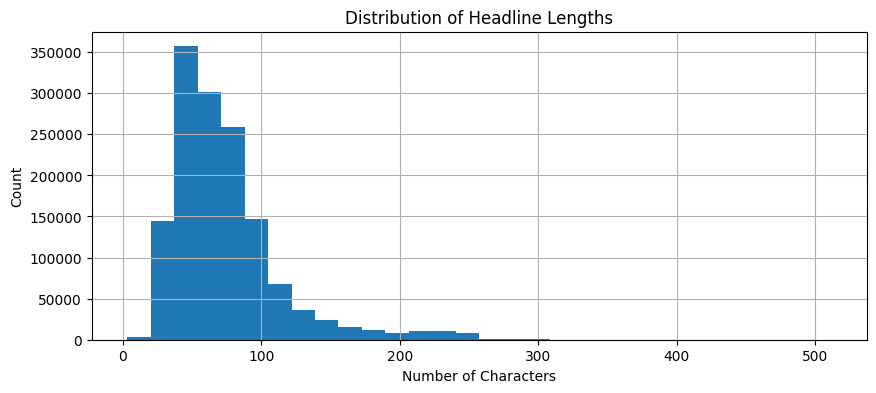

In [23]:
# Compute headline lengths
df["headline_length"] = compute_headline_lengths(df, headline_col="headline")

# Display basic statistics
print("Headline Length Statistics:\n")
print(df["headline_length"].describe())

# Plot histogram
plt.figure(figsize=(10,4))
df["headline_length"].hist(bins=30)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()


Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


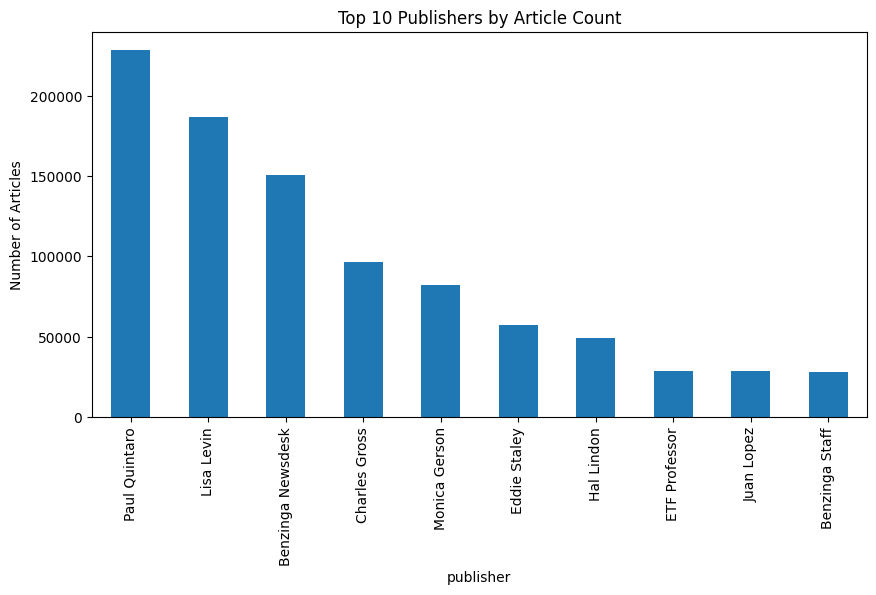

In [24]:
# Count articles per publisher
publisher_stats = publisher_counts(df, "publisher")

# Show top 10 publishers
print("Top 10 Publishers:\n", publisher_stats.head(10))

# Plot
publisher_stats.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Number of Articles")
plt.show()


Daily Article Counts:
 date_only
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


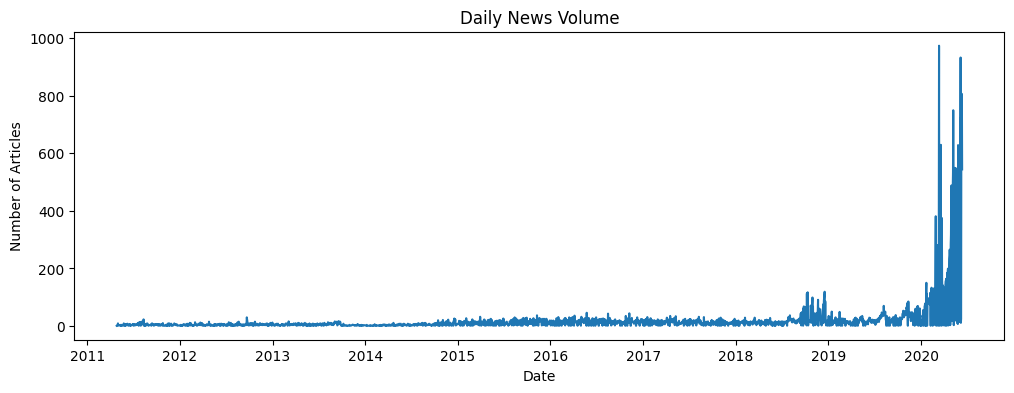

In [28]:
# Convert 'date' to datetime
df = parse_dates(df, date_col="date")

# Extract date only
df["date_only"] = df["date"].dt.date

# Daily article counts
daily_counts = df.groupby("date_only").size()
print("Daily Article Counts:\n", daily_counts)

# Plot daily trend
plt.figure(figsize=(12,4))
daily_counts.plot()
plt.title("Daily News Volume")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


Article Count by Hour of Day:
 hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


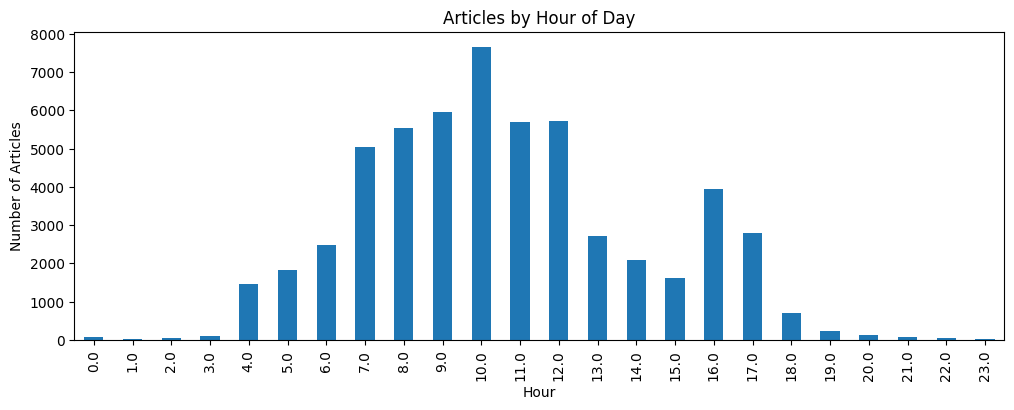

In [30]:
# Extract hour
df["hour"] = df["date"].dt.hour

# Count articles by hour
hourly_counts = df["hour"].value_counts().sort_index()
print("Article Count by Hour of Day:\n", hourly_counts)

# Plot
hourly_counts.plot(kind="bar", figsize=(12,4))
plt.title("Articles by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()


In [31]:
# Clean headlines for NLP
df["clean_headline"] = df["headline"].astype(str).apply(clean_text)

# Preview
df[["headline", "clean_headline"]].head()


,headline,clean_headline
0,Stocks That Hit 52-Week Highs On Friday,stocks hit week highs friday
1,Stocks That Hit 52-Week Highs On Wednesday,stocks hit week highs wednesday
2,71 Biggest Movers From Friday,biggest movers friday
3,46 Stocks Moving In Friday's Mid-Day Session,stocks moving friday mid day session
4,B of A Securities Maintains Neutral on Agilent...,securities maintains neutral agilent technolog...


In [32]:
# Extract top keywords / phrases
keywords = get_top_keywords(df["clean_headline"], top_n=20)

print("Top Keywords and Phrases:\n")
for word, count in keywords:
    print(f"{word}: {count}")


Top Keywords and Phrases:

stocks: 161776
est: 140632
eps: 128897
market: 120559
shares: 114313
reports: 108710
update: 91723
earnings: 87399
sales: 79645
top: 79632
benzinga: 74516
week: 69572
announces: 66591
price: 64407
buy: 64371
mid: 62263
downgrades: 61959
trading: 61183
eps est: 61155
raises: 57802


In [38]:
# Use the sampled clean headlines for faster LDA
sample = df["clean_headline"].sample(10000, random_state=42)

# Run LDA topic modeling
topics = run_lda(sample, n_topics=6, n_words=12)

# Print topics
for topic_id, words in topics:
    print(f"\nTopic {topic_id}:")
    print(", ".join(words))



Topic 0:
mid morning, update markets, market update, stock, mid, higher, morning market, earnings, morning, markets, update, market

Topic 1:
market, pre, benzinga top, estimate, stocks moving, moving, session, eps, stocks, sales, top, benzinga

Topic 2:
new week, dividend, stocks hit, hit week, hit, top, movers, stock, yesterday, new, week, stocks

Topic 3:
oil, lower, several, higher, earnings scheduled, scheduled, companies, market, update, trading, earnings, shares

Topic 4:
neutral, downgrades, coverage, announces, initiates, upgrades, price target, maintains, raises, target, price, buy

Topic 5:
est sales, year, est revenue, inc, sales, revenue, says, reports eps, eps est, eps, reports, est


Top Publisher Domains:
 publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


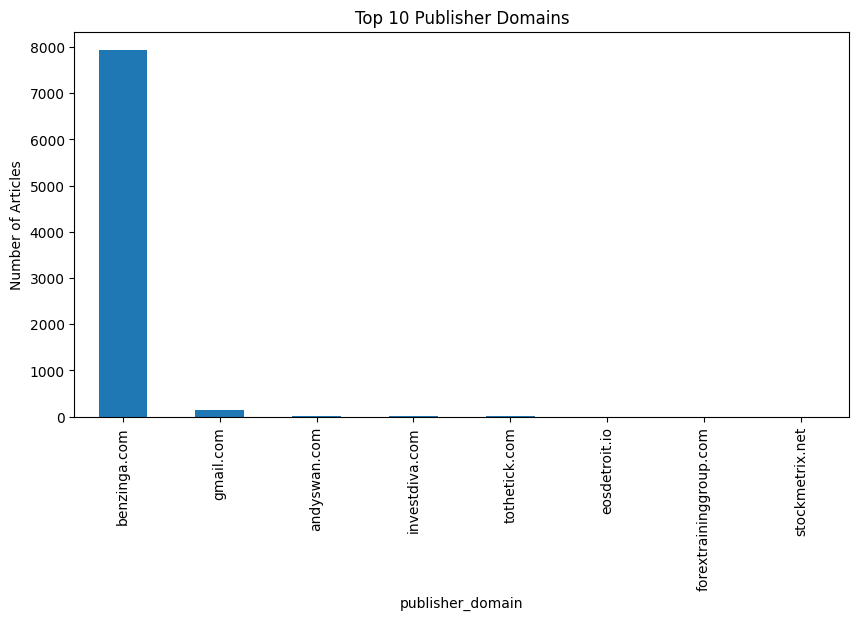

In [39]:
# Extract email domains if publisher is an email
if df["publisher"].str.contains("@").any():
    df["publisher_domain"] = df["publisher"].str.split("@").str[1]
    domain_counts = df["publisher_domain"].value_counts()
    print("Top Publisher Domains:\n", domain_counts.head(10))

    # Plot
    domain_counts.head(10).plot(kind="bar", figsize=(10,5))
    plt.title("Top 10 Publisher Domains")
    plt.ylabel("Number of Articles")
    plt.show()
